In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import math

In [8]:
df = pd.read_csv('hd_mortalitybyca.csv')
df

,Year,CA,CAQF,AgeGroup,AgeGroupQF,Sex,SexQF,Diagnosis,NumberOfDeaths,NumberOfDeathsQF,CrudeRate,CrudeRateQF,EASR
0,2012,S92000003,d,0-44 years,NaN,Males,NaN,Coronary Heart Disease,86.0,NaN,5.880185,NaN,6.172823
1,2012,S92000003,d,0-44 years,NaN,Females,NaN,Coronary Heart Disease,25.0,NaN,1.702501,NaN,1.714014
2,2012,S92000003,d,45-64 years,NaN,Males,NaN,Coronary Heart Disease,906.0,NaN,127.286342,NaN,129.121787
3,2012,S92000003,d,45-64 years,NaN,Females,NaN,Coronary Heart Disease,226.0,NaN,30.331051,NaN,30.834745
4,2012,S92000003,d,65-74 years,NaN,Males,NaN,Coronary Heart Disease,1023.0,NaN,428.071086,NaN,439.227442
...,...,...,...,...,...,...,...,...,...,...,...,...,...
17815,2021,S12000050,NaN,0-44 years,NaN,All,d,Heart Failure,0.0,NaN,0.000000,NaN,0.000000
17816,2021,S12000050,NaN,45-64 years,NaN,All,d,Heart Failure,NaN,c,NaN,c,2.158390
17817,2021,S12000050,NaN,65-74 years,NaN,All,d,Heart Failure,NaN,c,NaN,c,9.241572
17818,2021,S12000050,NaN,75plus years,NaN,All,d,Heart Failure,NaN,c,NaN,c,52.936148


In [9]:
df = df.drop(['CAQF', 'AgeGroupQF', 'SexQF', 'NumberOfDeathsQF', 'CrudeRateQF'], axis=1)
df

,Year,CA,AgeGroup,Sex,Diagnosis,NumberOfDeaths,CrudeRate,EASR
0,2012,S92000003,0-44 years,Males,Coronary Heart Disease,86.0,5.880185,6.172823
1,2012,S92000003,0-44 years,Females,Coronary Heart Disease,25.0,1.702501,1.714014
2,2012,S92000003,45-64 years,Males,Coronary Heart Disease,906.0,127.286342,129.121787
3,2012,S92000003,45-64 years,Females,Coronary Heart Disease,226.0,30.331051,30.834745
4,2012,S92000003,65-74 years,Males,Coronary Heart Disease,1023.0,428.071086,439.227442
...,...,...,...,...,...,...,...,...
17815,2021,S12000050,0-44 years,All,Heart Failure,0.0,0.000000,0.000000
17816,2021,S12000050,45-64 years,All,Heart Failure,NaN,NaN,2.158390
17817,2021,S12000050,65-74 years,All,Heart Failure,NaN,NaN,9.241572
17818,2021,S12000050,75plus years,All,Heart Failure,NaN,NaN,52.936148


In [15]:
df[df.isnull().any(axis=1)]
df2 = df.dropna()
df2

,Year,CA,AgeGroup,Sex,Diagnosis,NumberOfDeaths,CrudeRate,EASR
0,2012,S92000003,0-44 years,Males,Coronary Heart Disease,86.0,5.880185,6.172823
1,2012,S92000003,0-44 years,Females,Coronary Heart Disease,25.0,1.702501,1.714014
2,2012,S92000003,45-64 years,Males,Coronary Heart Disease,906.0,127.286342,129.121787
3,2012,S92000003,45-64 years,Females,Coronary Heart Disease,226.0,30.331051,30.834745
4,2012,S92000003,65-74 years,Males,Coronary Heart Disease,1023.0,428.071086,439.227442
...,...,...,...,...,...,...,...,...
17807,2021,S12000048,All,All,Heart Failure,12.0,7.801833,6.628059
17809,2021,S12000049,0-44 years,All,Heart Failure,0.0,0.000000,0.000000
17813,2021,S12000049,All,All,Heart Failure,41.0,6.455371,9.521978
17815,2021,S12000050,0-44 years,All,Heart Failure,0.0,0.000000,0.000000


In [26]:
df_2022 = df2[df2['Year'] == 2021] 
df2_age = df_2022[df_2022["AgeGroup"].str.contains("All") == False]
df2_age = df2_age[df2_age["AgeGroup"].str.contains("under75 years") == False] 
df2_age = df2_age[df2_age["Sex"].str.contains("Males") == False]
df2_age = df2_age[df2_age["Sex"].str.contains("Females") == False] 
df2_age

,Year,CA,AgeGroup,Sex,Diagnosis,NumberOfDeaths,CrudeRate,EASR
5743,2021,S92000003,0-44 years,All,Coronary Heart Disease,92.0,3.155100,3.415911
5744,2021,S92000003,45-64 years,All,Coronary Heart Disease,1241.0,83.281604,81.819762
5745,2021,S92000003,65-74 years,All,Coronary Heart Disease,1531.0,257.061208,261.401228
5746,2021,S92000003,75plus years,All,Coronary Heart Disease,4184.0,874.795884,936.178926
5779,2021,S12000013,0-44 years,All,Coronary Heart Disease,0.0,0.000000,0.000000
...,...,...,...,...,...,...,...,...
17797,2021,S12000047,0-44 years,All,Heart Failure,0.0,0.000000,0.000000
17803,2021,S12000048,0-44 years,All,Heart Failure,0.0,0.000000,0.000000
17805,2021,S12000048,65-74 years,All,Heart Failure,0.0,0.000000,0.000000
17809,2021,S12000049,0-44 years,All,Heart Failure,0.0,0.000000,0.000000


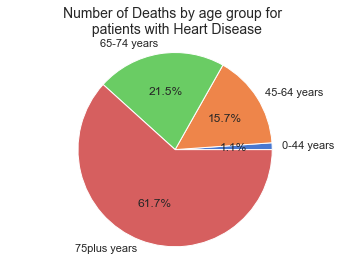

In [29]:
import matplotlib.pyplot as plt
sns.set_theme(style="white", palette = 'muted')
chd = df2_age[['AgeGroup', 'NumberOfDeaths']]
chd = chd.groupby(['AgeGroup'], as_index=False).sum()
chd

def autopct_format(values):
        def my_format(pct):
            total = sum(values)
            val = int(round(pct*total/100.0))
            return '{:.1f}%'.format(pct, v=val)
        return my_format

percentage = chd['NumberOfDeaths'].value_counts()
plt.pie(chd['NumberOfDeaths'], labels = chd['AgeGroup'], autopct=autopct_format(percentage))
plt.axis('equal')
plt.title('Number of Deaths by age group for \n patients with Heart Disease', fontsize = 14)
plt.show()

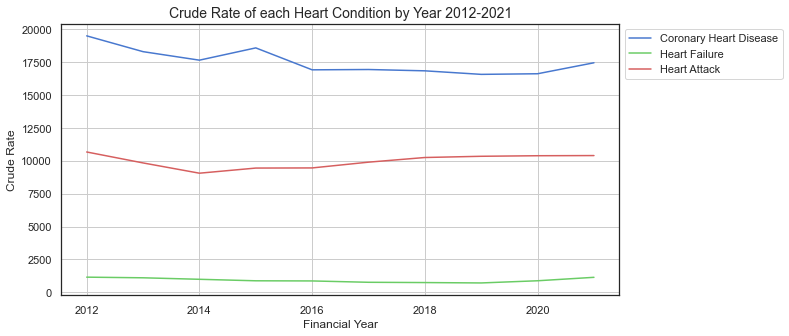

In [40]:
rate_year = df2[['Year', 'CrudeRate', 'Diagnosis']]
rate_year['Diagnosis'].unique()

CHD = rate_year.loc[df['Diagnosis']=='Coronary Heart Disease'] 
CHD = CHD.groupby(['Year']).sum().reset_index()

HA = rate_year.loc[df['Diagnosis']=='Heart Attack'] 
HA = HA.groupby(['Year']).sum().reset_index()

HF = rate_year.loc[df['Diagnosis']=='Heart Failure'] 
HF = HF.groupby(['Year']).sum().reset_index()

sns.set_theme(style="white", palette = 'muted')
plt.figure(figsize=(10,5))
plt.style.use("seaborn-muted")
plt.plot(CHD['Year'], CHD['CrudeRate'], label = 'Coronary Heart Disease')
plt.plot(HF['Year'], HF['CrudeRate'], label = 'Heart Failure')
plt.plot(HA['Year'], HA['CrudeRate'], label = 'Heart Attack')
plt.title('Crude Rate of each Heart Condition by Year 2012-2021', fontsize = 14)
plt.ylabel('Crude Rate')
plt.xlabel('Financial Year')
plt.legend(bbox_to_anchor=(1, 1))
plt.grid()
plt.show()

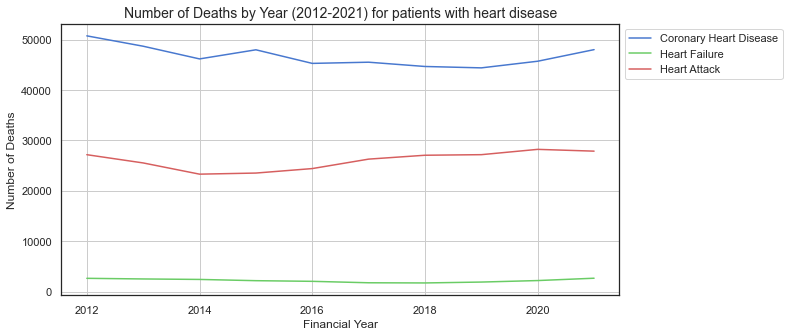

In [42]:
rate_year = df2[['Year', 'NumberOfDeaths', 'Diagnosis']]
rate_year['Diagnosis'].unique()

CHD = rate_year.loc[df['Diagnosis']=='Coronary Heart Disease'] 
CHD = CHD.groupby(['Year']).sum().reset_index()

HA = rate_year.loc[df['Diagnosis']=='Heart Attack'] 
HA = HA.groupby(['Year']).sum().reset_index()

HF = rate_year.loc[df['Diagnosis']=='Heart Failure'] 
HF = HF.groupby(['Year']).sum().reset_index()

sns.set_theme(style="white", palette = 'muted')
plt.figure(figsize=(10,5))
plt.style.use("seaborn-muted")
plt.plot(CHD['Year'], CHD['NumberOfDeaths'], label = 'Coronary Heart Disease')
plt.plot(HF['Year'], HF['NumberOfDeaths'], label = 'Heart Failure')
plt.plot(HA['Year'], HA['NumberOfDeaths'], label = 'Heart Attack')
plt.title('Number of Deaths by Year (2012-2021) for patients with heart disease', fontsize = 14)
plt.ylabel('Number of Deaths')
plt.xlabel('Financial Year')
plt.legend(bbox_to_anchor=(1, 1))
plt.grid()
plt.show()

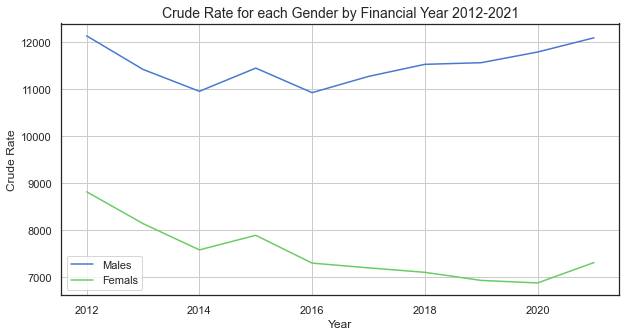

In [35]:
rate_year2 = df2[['Year', 'Sex', 'CrudeRate']]
rate_year2
rate_year_male = rate_year2.loc[df['Sex']=='Males'] 
rate_year_male = rate_year_male.groupby(['Year']).sum().reset_index()
rate_year_female = rate_year2.loc[df['Sex']=='Females'] 
rate_year_female = rate_year_female.groupby(['Year']).sum().reset_index()

sns.set_theme(style="white", palette = 'muted')
plt.figure(figsize=(10,5))
plt.style.use("seaborn-muted")
plt.plot(rate_year_male['Year'], rate_year_male['CrudeRate'], label = 'Males')
plt.plot(rate_year_female['Year'], rate_year_female['CrudeRate'], label = 'Femals')
plt.title('Crude Rate for each Gender by Financial Year 2012-2021', fontsize = 14)
plt.ylabel('Crude Rate')
plt.xlabel('Year')
plt.grid()
plt.legend()
plt.show()

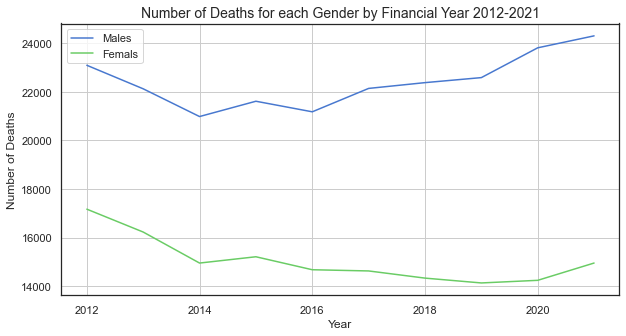

In [39]:
rate_year2 = df2[['Year', 'Sex', 'NumberOfDeaths']]
rate_year2
rate_year_male = rate_year2.loc[df['Sex']=='Males'] 
rate_year_male = rate_year_male.groupby(['Year']).sum().reset_index()
rate_year_female = rate_year2.loc[df['Sex']=='Females'] 
rate_year_female = rate_year_female.groupby(['Year']).sum().reset_index()

sns.set_theme(style="white", palette = 'muted')
plt.figure(figsize=(10,5))
plt.style.use("seaborn-muted")
plt.plot(rate_year_male['Year'], rate_year_male['NumberOfDeaths'], label = 'Males')
plt.plot(rate_year_female['Year'], rate_year_female['NumberOfDeaths'], label = 'Femals')
plt.title('Number of Deaths for each Gender by Financial Year 2012-2021', fontsize = 14)
plt.ylabel('Number of Deaths')
plt.xlabel('Year')
plt.grid()
plt.legend()
plt.show()